In [2]:
#https://www.kaggle.com/fernandol/cracking-the-walmart-sales-forecasting-challenge/notebook
import pandas as pd

In [3]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
train['split'] = 'train'
test['split'] = 'test'
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,split
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513,train
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114,train
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167,train
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078,train
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819,train


In [4]:
data = pd.concat([train, test])
data.tail()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Type,Unemployment,Weekly_Sales,split
139114,129.826833,2011-11-18,91,3.669,False,86.59,6.00,NaN,NaN,3220.86,39690,33,63.35,A,8.010,NaN,test
139115,130.645793,2012-03-02,85,3.242,False,25204.67,2436.75,167.88,16066.76,7289.69,219622,13,32.36,A,6.104,NaN,test
139116,211.855267,2011-01-28,91,3.010,False,NaN,NaN,NaN,NaN,NaN,42988,30,44.04,C,8.028,NaN,test
139117,197.655186,2012-06-08,32,3.741,False,8483.84,361.80,77.99,1640.00,6841.59,203007,32,71.14,A,8.090,NaN,test
139118,141.843393,2012-04-13,33,4.187,False,5139.48,4770.63,53.84,1532.47,4176.90,204184,27,52.22,A,8.253,NaN,test


In [5]:
data.describe()

,CPI,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,282451.000000
mean,171.201947,44.260317,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136727.915739,22.200546,60.090059,7.960289,15983.429692
std,39.159276,30.492054,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,60980.583328,12.785297,18.447931,1.863296,22661.092494
min,126.064000,1.000000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,34875.000000,1.000000,-2.060000,3.879000,-4988.940000
25%,132.022667,18.000000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,93638.000000,11.000000,46.680000,6.891000,2079.330000
50%,182.318780,37.000000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,140167.000000,22.000000,62.090000,7.866000,7616.550000
75%,212.416993,74.000000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,202505.000000,33.000000,74.280000,8.572000,20245.745000
max,227.232807,99.000000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,219622.000000,45.000000,100.140000,14.313000,693099.360000


In [6]:
data['Temperature'] = (data['Temperature']-32)*5/9

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns


n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y, size, color):
    fig, ax = plt.subplots(figsize=(11, 9))
    
    plot_grid = plt.GridSpec(1, 100, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    #fig, ax = plt.subplots(plot_grid[:,:-1],figsize=(11, 9))
    #ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale,
        c=color.apply(value_to_color), # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    

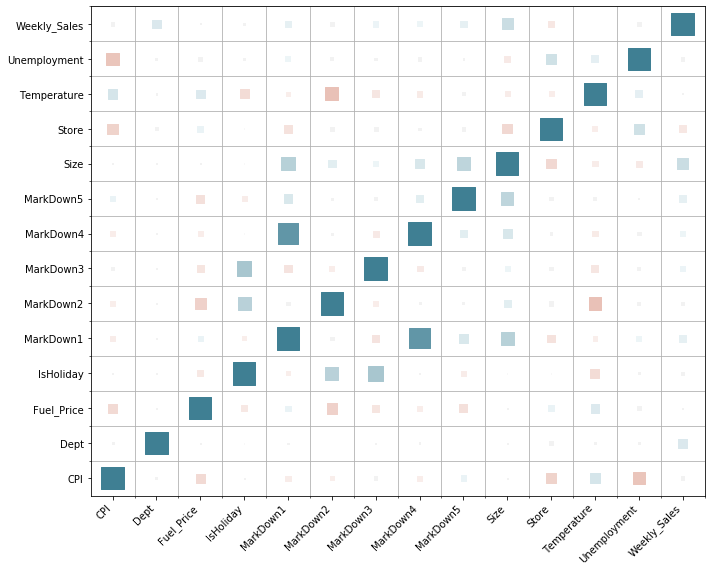

In [8]:
columns = data.columns
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color = corr['value']
)

In [9]:
data[data['Weekly_Sales'] >300000]


,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Type,Unemployment,Weekly_Sales,split
29352,132.836933,2010-11-26,72,3.070,True,NaN,NaN,NaN,NaN,NaN,114533,23,1.638889,B,5.287,369830.98,train
41292,210.515277,2010-11-26,72,2.735,True,NaN,NaN,NaN,NaN,NaN,184109,39,19.861111,A,8.476,339700.62,train
66187,132.836933,2010-11-26,72,3.070,True,NaN,NaN,NaN,NaN,NaN,120653,18,4.894444,B,9.331,353008.64,train
83588,129.836400,2011-11-25,72,3.760,True,174.72,329.00,141630.61,79.00,1009.98,126512,10,15.933333,B,7.874,630999.19,train
93294,126.669267,2010-11-26,72,2.752,True,NaN,NaN,NaN,NaN,NaN,205863,4,8.933333,A,7.127,381072.11,train
97641,126.983581,2010-12-24,72,3.236,False,NaN,NaN,NaN,NaN,NaN,126512,10,13.922222,B,9.003,404245.03,train
116197,140.421786,2011-11-25,72,3.689,True,164.01,27.47,73934.06,24.22,540.56,204184,27,8.822222,A,7.906,368484.19,train
121958,126.669267,2010-11-26,72,3.162,True,NaN,NaN,NaN,NaN,NaN,112238,12,8.700000,B,14.313,359995.60,train
140076,140.421786,2011-11-25,72,3.536,True,1649.31,NaN,70087.94,7.50,5266.90,119557,22,7.933333,B,7.706,345532.23,train
150574,136.478800,2011-11-25,72,3.536,True,748.82,46.00,71366.86,19.00,577.40,120653,18,5.538889,B,8.471,305161.38,train


In [10]:
data.loc[data['Weekly_Sales'] >300000, 'Dept'].value_counts()

72    20
7      1
Name: Dept, dtype: int64

In [11]:
data.loc[data['Weekly_Sales'] >300000, 'Date'].value_counts()

2011-11-25    9
2010-11-26    9
2010-12-24    2
2011-12-23    1
Name: Date, dtype: int64

In [12]:
data.loc[data['Weekly_Sales'] >300000, 'IsHoliday'].value_counts()

True     18
False     3
Name: IsHoliday, dtype: int64

In [13]:
data.isnull().sum()

CPI                  0
Date                 0
Dept                 0
Fuel_Price           0
IsHoliday            0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
Size                 0
Store                0
Temperature          0
Type                 0
Unemployment         0
Weekly_Sales    139119
split                0
dtype: int64

In [14]:
data['md1_present'] = data.MarkDown1.notnull()
data['md2_present'] = data.MarkDown2.notnull()
data['md3_present'] = data.MarkDown3.notnull()
data['md4_present'] = data.MarkDown4.notnull()

In [15]:
data.fillna(0,inplace = True)

In [16]:
data.select_dtypes(exclude=['int', 'float']).columns

Index(['Date', 'IsHoliday', 'Type', 'split', 'md1_present', 'md2_present',
       'md3_present', 'md4_present'],
      dtype='object')

In [17]:
data['Store']='Store_'+data['Store'].map(str)
data['Type']='Type_'+data['Type'].map(str)
data['IsHoliday']='IsHoliday_'+data['IsHoliday'].map(str)
data['Dept']='Dept_'+data['Dept'].map(str)

In [19]:
store_dummies = pd.get_dummies(data['Store'])
type_dummies = pd.get_dummies(data['Type'])
holiday_dummies = pd.get_dummies(data['IsHoliday'])
dept_dummies = pd.get_dummies(data['Dept'])

In [20]:
import numpy as np
from datetime import datetime

In [21]:
data['Month'] = [ datetime.strptime(date ,'%Y-%m-%d').date().month for date in data['Date']] #Derive month

In [22]:
data['Month'] = 'Month_'+data['Month'].map(str)

In [23]:
month_dummies = pd.get_dummies(data['Month'])

In [24]:
# Detecting pre-christmas / Black friday holiday
# Sales highest for these days, so importance is given

In [25]:
data['DateType'] = [datetime.strptime(date ,'%Y-%m-%d').date() for date in data['Date']]

In [26]:
data['Black_Friday'] =np.where((data['DateType']==datetime(2010, 11, 26).date()) | (data['DateType']==datetime(2011, 11, 25).date()),'yes', 'no')

In [27]:
data['Pre_Christmas'] =np.where(
    (data['DateType']==datetime(2010, 12, 23).date()) | 
    (data['DateType']==datetime(2010, 12, 23).date()) |
    (data['DateType']==datetime(2011, 12, 23).date()) |
    (data['DateType']==datetime(2011, 12, 23).date())
    ,'yes', 'no')

In [28]:
data['Black_Friday'] = 'Black_Friday_'+data['Black_Friday'].map(str)
data['Pre_Christmas'] = 'Pre_Christmas_'+data['Pre_Christmas'].map(str)

In [29]:
black_firday_dummies = pd.get_dummies(data['Black_Friday'])
pre_christmas_dummies = pd.get_dummies(data['Pre_Christmas'])

In [30]:
med_sales =data[data['split']=='train'].groupby(by=['Type','Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()

In [31]:
medians = pd.DataFrame({'Median_Sales':med_sales }).reset_index()# Convert to df to merge

In [32]:
data = data.merge(medians, how="outer", on =['Type','Dept','Store','Month','IsHoliday'])
# Now all date entires are populated with median values

In [33]:
data['key'] = data['Type'].map(str)+data['Dept'].map(str)+data['Store'].map(str)+ data['Month'].map(str)+data['IsHoliday'].map(str)

In [34]:
data['Median_Sales'].fillna(data[data['split']=='train']['Median_Sales'].median(), inplace= True)

In [35]:
data.columns

Index(['CPI', 'Date', 'Dept', 'Fuel_Price', 'IsHoliday', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size', 'Store',
       'Temperature', 'Type', 'Unemployment', 'Weekly_Sales', 'split',
       'md1_present', 'md2_present', 'md3_present', 'md4_present', 'Month',
       'DateType', 'Black_Friday', 'Pre_Christmas', 'Median_Sales', 'key'],
      dtype='object')

In [36]:
sorted_df = data.sort_values(['Store', 'Dept','DateType'], ascending=[1, 1,1])

In [37]:
data.shape
#data,store_dummies,type_dummies,holiday_dummies,dept_dummies,black_firday_dummies,pre_christmas_dummies,month_dummies

(421570, 27)

In [38]:
data.reset_index(drop=True, inplace=True)
store_dummies.reset_index(drop=True, inplace=True)
type_dummies.reset_index(drop=True, inplace=True)
holiday_dummies.reset_index(drop=True, inplace=True)
dept_dummies.reset_index(drop=True, inplace=True)
black_firday_dummies.reset_index(drop=True, inplace=True)
pre_christmas_dummies.reset_index(drop=True, inplace=True)
month_dummies.reset_index(drop=True, inplace=True)
data =pd.concat([data,type_dummies,store_dummies,dept_dummies,holiday_dummies,pre_christmas_dummies,black_firday_dummies,month_dummies],axis=1)

In [39]:
data['Difference'] = data['Median_Sales'] - data['Weekly_Sales']
# Algo to calcuate difference

In [40]:
def normalize(field, df):
    df[field] =(df[field] - df[field].mean())/(df[field].std())
    return df
    

In [41]:
data = normalize('CPI',data)
data = normalize('Fuel_Price',data)
data = normalize('CPI',data)
data = normalize('MarkDown1',data)
data = normalize('MarkDown2',data)
data = normalize('MarkDown3',data)
data = normalize('MarkDown4',data)
data = normalize('MarkDown5',data)
data = normalize('Size',data)
data = normalize('Temperature',data)
data = normalize('Unemployment',data)


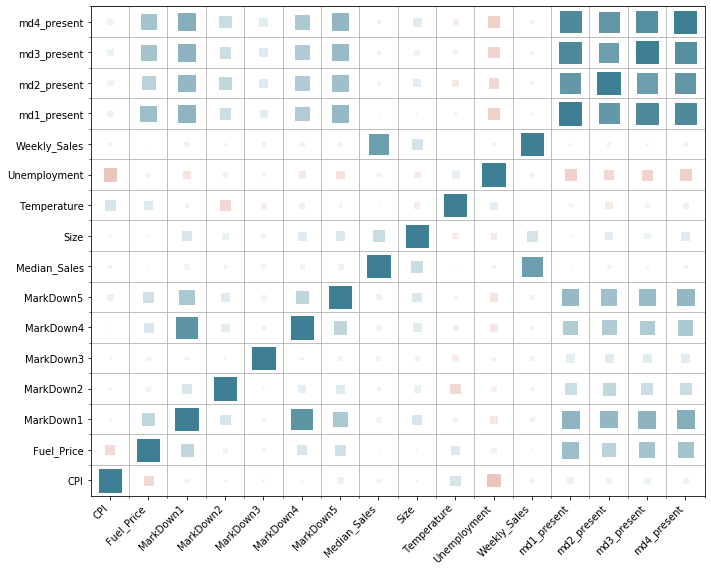

In [42]:
columns = data.columns[0:26]
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color = corr['value']
)

In [43]:
print(data.columns[0:26])

print(data.columns[0:20])
print(data.columns[20:40])
print(data.columns[40:100])

Index(['CPI', 'Date', 'Dept', 'Fuel_Price', 'IsHoliday', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size', 'Store',
       'Temperature', 'Type', 'Unemployment', 'Weekly_Sales', 'split',
       'md1_present', 'md2_present', 'md3_present', 'md4_present', 'Month',
       'DateType', 'Black_Friday', 'Pre_Christmas', 'Median_Sales'],
      dtype='object')
Index(['CPI', 'Date', 'Dept', 'Fuel_Price', 'IsHoliday', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size', 'Store',
       'Temperature', 'Type', 'Unemployment', 'Weekly_Sales', 'split',
       'md1_present', 'md2_present', 'md3_present'],
      dtype='object')
Index(['md4_present', 'Month', 'DateType', 'Black_Friday', 'Pre_Christmas',
       'Median_Sales', 'key', 'Type_A', 'Type_B', 'Type_C', 'Store_1',
       'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15',
       'Store_16', 'Store_17', 'Store_18'],
      dtype='object')
Index(['Store_19', 'Store_2', 'S

In [44]:
features = ['CPI', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size',
       'Temperature', 'Unemployment',
       'md1_present', 'md2_present', 'md3_present', 'md4_present',
        'Type_A', 'Type_B', 'Type_C', 'Store_1',
       'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15',
       'Store_16', 'Store_17', 'Store_18',
       'Store_19', 'Store_2', 'Store_20', 'Store_21', 'Store_22', 'Store_23',
       'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29',
       'Store_3', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34',
       'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_4',
       'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45',
       'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 
        'Dept_1',
       'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14', 'Dept_16',
       'Dept_17', 'Dept_18', 'Dept_19', 'Dept_2', 'Dept_20', 'Dept_21',
       'Dept_22', 'Dept_23', 'Dept_24', 'Dept_25', 'Dept_26', 'Dept_27',
       'Dept_28', 'Dept_29', 'Dept_3', 'Dept_30', 'Dept_31', 'Dept_32']

features_full =['Median_Sales','Weekly_Sales']
features_full.extend(features) 


In [45]:
#display(data[features].describe())
display(data[features].head())
display(data[features_full].head())

#print(features_full)

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,...,Dept_24,Dept_25,Dept_26,Dept_27,Dept_28,Dept_29,Dept_3,Dept_30,Dept_31,Dept_32
0,-0.893488,0.948658,-0.427943,-0.173069,-0.084662,-0.278116,-0.395180,0.258854,0.054746,-0.103735,...,0,0,0,0,0,0,0,0,0,0
1,-0.840682,1.118773,0.316735,-0.166460,-0.057630,0.201135,0.718423,0.258854,0.107868,-0.298014,...,0,0,0,0,0,0,0,0,0,0
2,-0.897563,1.182020,-0.427943,-0.173069,-0.084662,-0.278116,-0.395180,0.258854,0.166411,-0.103735,...,0,0,0,0,1,0,0,0,0,0
3,-0.844198,0.896315,0.519160,-0.169607,-0.083496,0.113364,0.184707,0.258854,0.375107,-0.298014,...,0,0,0,0,0,0,0,0,0,0
4,-0.843127,1.044620,-0.026291,-0.169922,-0.083660,-0.065074,0.327024,0.258854,0.295423,-0.298014,...,0,0,0,0,0,0,0,0,0,0


,Median_Sales,Weekly_Sales,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,...,Dept_24,Dept_25,Dept_26,Dept_27,Dept_28,Dept_29,Dept_3,Dept_30,Dept_31,Dept_32
0,93212.89,87235.57,-0.893488,0.948658,-0.427943,-0.173069,-0.084662,-0.278116,-0.395180,0.258854,...,0,0,0,0,0,0,0,0,0,0
1,93212.89,88145.09,-0.840682,1.118773,0.316735,-0.166460,-0.057630,0.201135,0.718423,0.258854,...,0,0,0,0,0,0,0,0,0,0
2,93212.89,96906.53,-0.897563,1.182020,-0.427943,-0.173069,-0.084662,-0.278116,-0.395180,0.258854,...,0,0,0,0,1,0,0,0,0,0
3,93212.89,111812.56,-0.844198,0.896315,0.519160,-0.169607,-0.083496,0.113364,0.184707,0.258854,...,0,0,0,0,0,0,0,0,0,0
4,93212.89,93212.89,-0.843127,1.044620,-0.026291,-0.169922,-0.083660,-0.065074,0.327024,0.258854,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train = data[data['split'] == "train"]
test = data[data['split'] == "test"]

In [47]:
test.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Difference
7,-0.984194,2010-08-20,Dept_92,-1.232298,IsHoliday_False,-0.427943,-0.173069,-0.084662,-0.278116,-0.39518,...,1,0,0,0,0,0,0,0,0,93212.89
8,-0.895262,2011-08-12,Dept_92,1.131858,IsHoliday_False,-0.427943,-0.173069,-0.084662,-0.278116,-0.39518,...,0,0,0,0,0,0,0,0,0,93212.89
9,-0.985405,2010-08-06,Dept_92,-1.241022,IsHoliday_False,-0.427943,-0.173069,-0.084662,-0.278116,-0.39518,...,0,0,1,0,0,0,0,0,0,93212.89
10,-0.983387,2010-08-27,Dept_92,-1.289003,IsHoliday_False,-0.427943,-0.173069,-0.084662,-0.278116,-0.39518,...,0,1,0,0,0,0,0,0,0,93212.89
11,-0.894266,2011-08-19,Dept_92,1.001001,IsHoliday_False,-0.427943,-0.173069,-0.084662,-0.278116,-0.39518,...,0,1,0,0,0,0,0,0,0,93212.89


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(train[features_full], train['Difference'], test_size=0.2, random_state=42)
print(X_dev.shape)
print(y_dev.shape)
print(X_train.shape)
print(y_train.shape)

(56491, 89)
(56491,)
(225960, 89)
(225960,)


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse

In [51]:
#Random forest model specification
regr = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)
#Train on data
regr.fit(X_train[features], y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.2min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
                      oob_score=False, random_state=None, verbose=2,
                      warm_start=False)

In [53]:
y_pred_random = regr.predict(X_dev[features])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.1s finished


In [54]:
#print(list(y_pred_random))

In [55]:
#print(list(y_dev))

In [56]:
#X_dev.columns
# Median_Sales
# Weekly_Sales
pred = X_dev['Median_Sales'] - y_pred_random
#pred

In [57]:
act= X_dev['Weekly_Sales']
#act

In [60]:
print(train.columns[0:30])
print(train.columns[0:60])

Index(['CPI', 'Date', 'Dept', 'Fuel_Price', 'IsHoliday', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size', 'Store',
       'Temperature', 'Type', 'Unemployment', 'Weekly_Sales', 'split',
       'md1_present', 'md2_present', 'md3_present', 'md4_present', 'Month',
       'DateType', 'Black_Friday', 'Pre_Christmas', 'Median_Sales', 'key',
       'Type_A', 'Type_B', 'Type_C'],
      dtype='object')
Index(['CPI', 'Date', 'Dept', 'Fuel_Price', 'IsHoliday', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size', 'Store',
       'Temperature', 'Type', 'Unemployment', 'Weekly_Sales', 'split',
       'md1_present', 'md2_present', 'md3_present', 'md4_present', 'Month',
       'DateType', 'Black_Friday', 'Pre_Christmas', 'Median_Sales', 'key',
       'Type_A', 'Type_B', 'Type_C', 'Store_1', 'Store_10', 'Store_11',
       'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17',
       'Store_18', 'Store_19', 'Store_2', 'Store_20',

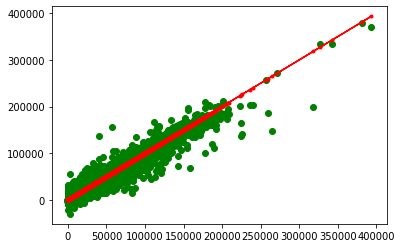

In [412]:
plt.scatter(act, pred, c='green')
plt.plot(act, act, c= "red", marker='.')

#plt.gca().invert_yaxis()
plt.show()

In [414]:
max(pred-act)

100173.0826

In [415]:
min(pred-act)

-119079.28382083334

In [465]:
l= list(map(abs, list(pred-act)))
#l =list(filter(lambda x: (x <5000 and x > -5000) , l))

In [460]:
len(pred-act)

56491

In [461]:
len(l)

51980

In [467]:
sum(l) / len(l) 

1858.6381921380876

In [74]:
simple_diff = abs(train['Median_Sales'] -train['Weekly_Sales'])

In [75]:
sum(simple_diff) /len(simple_diff)

1468.6326667988722

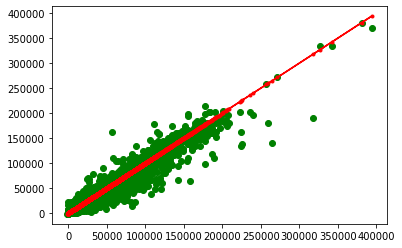

In [70]:
plt.scatter(act, X_dev['Median_Sales'], c='green')
plt.plot(act, act, c= "red", marker='.')

#plt.gca().invert_yaxis()
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.3s finished


In [84]:
y_train_pre = regr.predict(X_train[features])
w_s = X_train['Median_Sales'] - y_train_pre
dif =abs(w_s - X_train['Weekly_Sales'])

err =sum(dif)/len(dif)
err


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.4s finished


849.6894226205443

In [86]:
w_s = X_train['Median_Sales'] - y_train_pre
dif =abs(X_train['Median_Sales'] - X_train['Weekly_Sales'])

err =sum(dif)/len(dif)

err

1468.0731032262495

In [87]:
y_train_pre = regr.predict(X_dev[features])
w_s = X_dev['Median_Sales'] - y_train_pre
dif =abs(w_s - X_dev['Weekly_Sales'])

err =sum(dif)/len(dif)
print(err)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


1855.4867326617846


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.1s finished
